<a href="https://colab.research.google.com/github/Arnabsaha6/Machine-Learning/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [0]:
df= pd.read_csv('IndividualDetails.csv')

In [0]:
df.head(10)

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected city pt,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Current location,Current location pt,Created on,Updated on,Contacts
0,1,1,KL-TS-P1,30/Jan/2020,20.0,Female,Thrissur,SRID=4326;POINT (76.21325419999999 10.5256264),Thrissur,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.21325419999999 10.5256264),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
1,2,2,KL-AL-P1,02/Feb/2020,NaN,Unknown,Alappuzha,SRID=4326;POINT (76.333482 9.498000100000001),Alappuzha,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (76.333482 9.498000100000001),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
2,3,3,KL-KS-P1,03/Feb/2020,NaN,Unknown,Kasargode,SRID=4326;POINT (80 20),Kasaragod,Kerala,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
3,4,4,DL-P1,02/Mar/2020,45.0,Male,East Delhi (Mayur Vihar),SRID=4326;POINT (80 20),East Delhi,Delhi,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...",NaN,SRID=4326;POINT (80 20),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,02/Mar/2020,NaN,Unknown,Hyderabad,SRID=4326;POINT (78.4349398685041 17.4263524),Hyderabad,Telangana,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN,SRID=4326;POINT (78.4349398685041 17.4263524),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,NaN
5,6,6,NaN,03/Mar/2020,69.0,Male,Jaipur,SRID=4326;POINT (75.82034899999999 26.916194),Jaipur,Rajasthan,Italy,Recovered,03/03/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (75.82034899999999 26.916194),03/23/2020 12:20 p.m.,03/23/2020 12:20 p.m.,"Patient 7:, Patient 8:, Patient 9:, Patient 10..."
6,7,7,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
7,8,8,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
8,9,9,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:
9,10,10,NaN,04/Mar/2020,55.0,Unknown,Gurugram,SRID=4326;POINT (77.0299194 28.4646148),Gurugram,Haryana,Italy,Hospitalized,03/04/2020,Travelled from Italy.\nItalian tourist,NaN,SRID=4326;POINT (77.0299194 28.4646148),03/23/2020 12:20 p.m.,03/23/2020 12:34 p.m.,Patient 6:


In [0]:
df.drop(['Current location','Current location pt',	'Created on','Updated on','Detected city pt'],axis=1)

,ID,Unique id,Government id,Diagnosed date,Age,Gender,Detected city,Detected district,Detected state,Nationality,Current status,Status change date,Notes,Contacts
0,1,1,KL-TS-P1,2020-01-30,20.0,Female,Thrissur,Thrissur,<class 'list'>,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
1,2,2,KL-AL-P1,2020-02-02,37.0,Unknown,Alappuzha,Alappuzha,<class 'list'>,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
2,3,3,KL-KS-P1,2020-02-03,37.0,Unknown,Kasargode,Kasaragod,<class 'list'>,India,Recovered,02/14/2020,Travelled from Wuhan.\nStudent from Wuhan,NaN
3,4,4,DL-P1,2020-03-02,45.0,Male,East Delhi (Mayur Vihar),East Delhi,<class 'list'>,India,Recovered,03/15/2020,"Travelled from Austria, Italy.\nTravel history...","Patient 22:, Patient 23:, Patient 24:, Patient..."
4,5,5,TS-P1,2020-03-02,37.0,Unknown,Hyderabad,Hyderabad,<class 'list'>,India,Recovered,03/02/2020,"Travelled from Dubai, Singapore contact.\nTrav...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,500,500,NaN,2020-03-23,25.0,Male,Chennai,Chennai,<class 'list'>,NaN,Hospitalized,02/23/2020,Travelled from London - RGGH,NaN
500,501,501,NaN,2020-03-23,48.0,Male,Tiruppur,Tiruppur,<class 'list'>,NaN,Hospitalized,02/23/2020,Travelled from London - ESI,NaN
501,502,502,NaN,2020-03-23,54.0,Male,Madurai,Madurai,<class 'list'>,NaN,Hospitalized,02/23/2020,Annanagar at Rajaji Hosp. No mention of travel...,NaN
502,503,503,NaN,2020-03-23,24.0,Male,NaN,Patna,<class 'list'>,NaN,Hospitalized,02/23/2020,Travelled from Scotland,NaN


In [0]:
df.shape

(504, 19)

In [0]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
11,Current status,1
13,Notes,3
6,Detected city,125
8,Detected district,147
10,Nationality,155
4,Age,255
18,Contacts,357
2,Government id,381
14,Current location,501


In [0]:
df.describe()

,ID,Unique id,Age
count,504.000000,504.000000,249.000000
mean,252.500000,252.500000,40.477912
std,145.636534,145.636534,17.799752
min,1.000000,1.000000,2.000000
25%,126.750000,126.750000,25.000000
50%,252.500000,252.500000,37.000000
75%,378.250000,378.250000,55.000000
max,504.000000,504.000000,96.000000


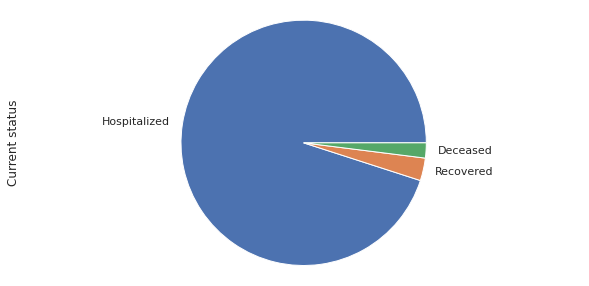

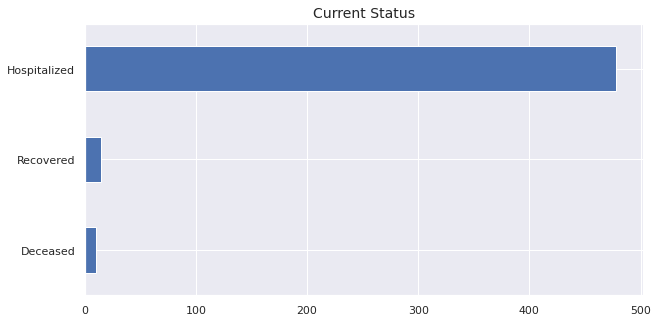

In [0]:
col = 'Current status'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Current Status', fontsize=14)

plt.show()

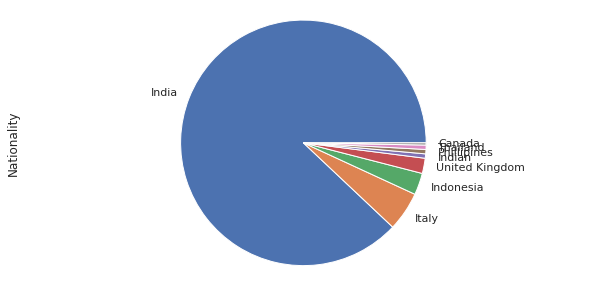

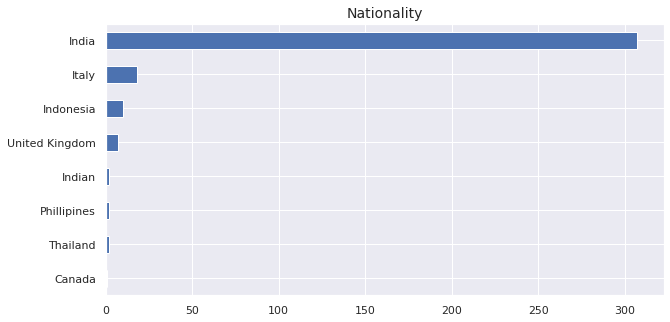

In [0]:
col = 'Nationality'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Nationality', fontsize=14)
plt.show()


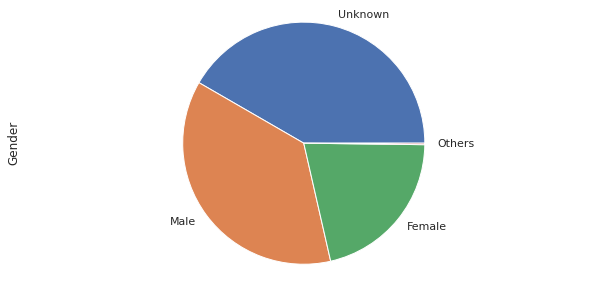

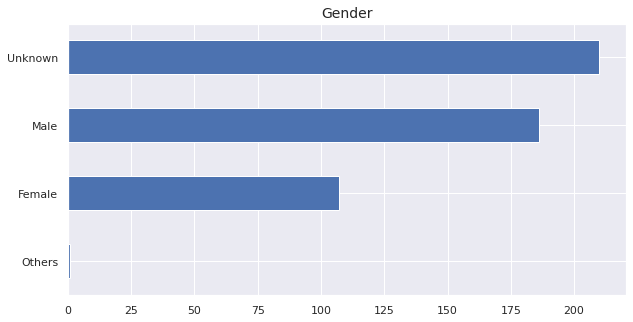

In [0]:
col = 'Gender'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Gender', fontsize=14)
plt.show()

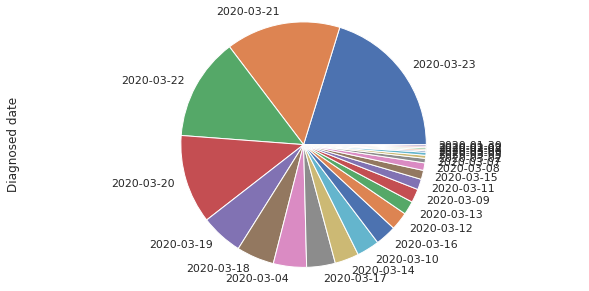

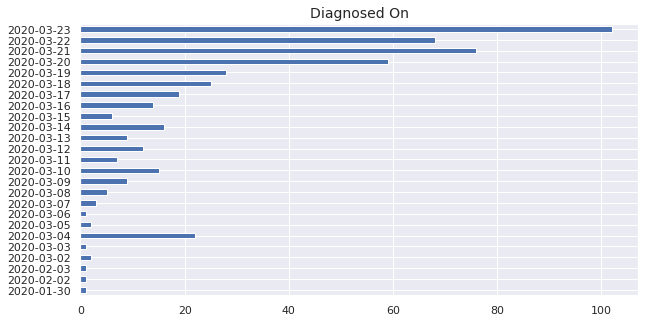

In [0]:
df["Diagnosed date"] = pd.to_datetime(df["Diagnosed date"]).dt.strftime('%Y-%m-%d')

col = 'Diagnosed date'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts().sort_index().plot(kind='barh', figsize=(10,5))
plt.title('Diagnosed On', fontsize=14)
plt.show()

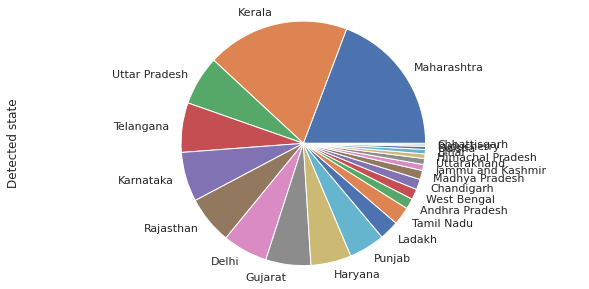

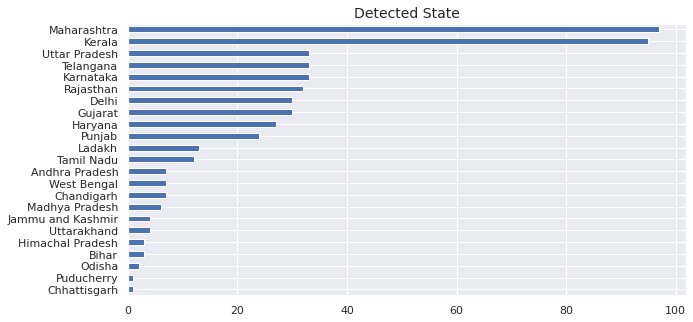

In [0]:
col = 'Detected state'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts().plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Detected State', fontsize=14)
plt.show()

In [0]:
tmp = pd.concat([pd.DataFrame(df['Diagnosed date'].value_counts().sort_index()),
           pd.DataFrame(df[df['Detected state'] == 'Kerala']['Diagnosed date'].value_counts().sort_index()),
           pd.DataFrame(df[df['Detected state'] == 'Maharashtra']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Karnataka']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Telangana']['Diagnosed date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['Detected state'] == 'Uttar Pradesh']['Diagnosed date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Kerala','Maharashtra','Karnataka','Telangana','Uttar Pradesh']

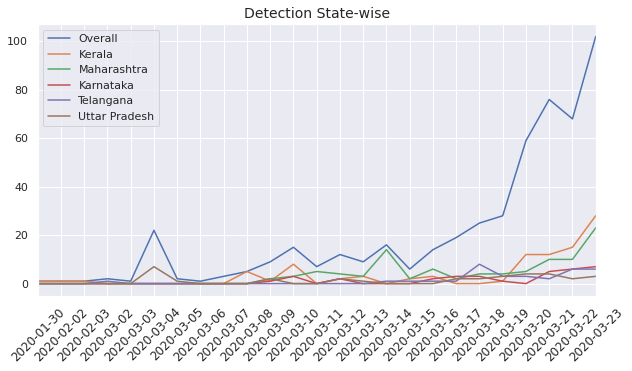

In [0]:
tmp.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Detection State-wise', fontsize=14)
plt.show()

In [0]:
tmp_cumsum = pd.DataFrame()
tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Maharashtra_CumSum'] = tmp['Maharashtra'].cumsum()
tmp_cumsum['Kerala_CumSum'] = tmp['Kerala'].cumsum()
tmp_cumsum['Karnataka_CumSum'] = tmp['Karnataka'].cumsum()
tmp_cumsum['Telangana_CumSum'] = tmp['Telangana'].cumsum()
tmp_cumsum['Uttar Pradesh_CumSum'] = tmp['Uttar Pradesh'].cumsum()

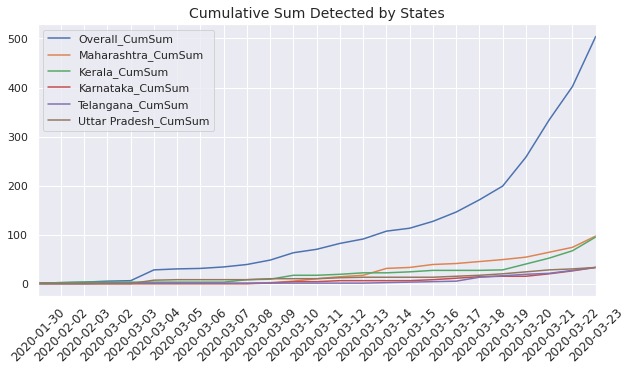

In [0]:
tmp_cumsum.plot(figsize=(10,5))

plt.xticks(list(range(len(tmp.index))), tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Detected by States', fontsize=14)
plt.show()

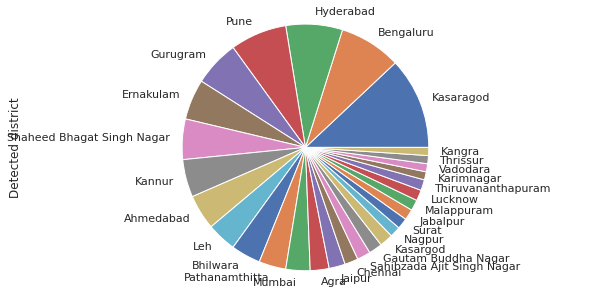

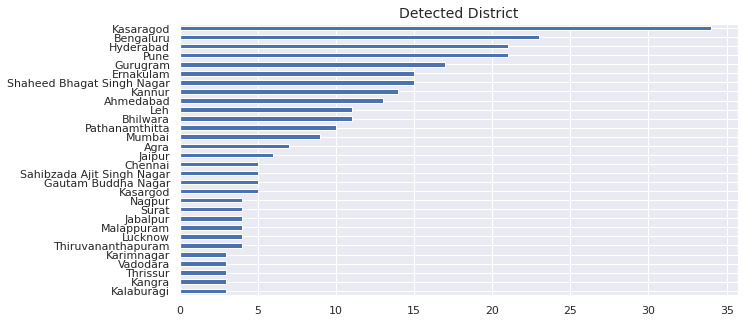

In [0]:
col = 'Detected district'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected District', fontsize=14)
plt.show()

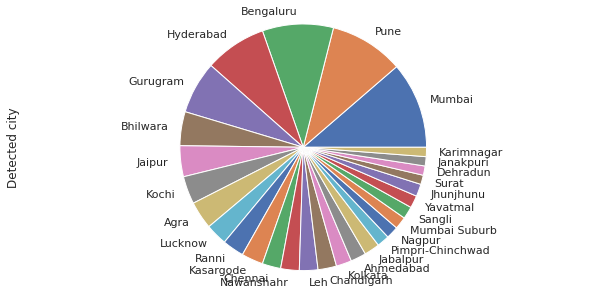

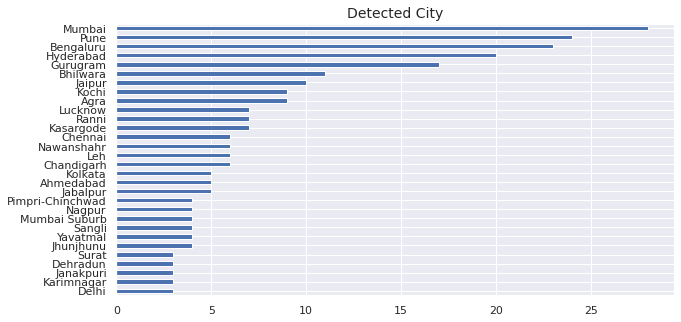

In [0]:
col = 'Detected city'

fig1, ax1 = plt.subplots(figsize=(10,5))

df[col].value_counts()[0:29].plot(kind='pie', figsize=(10,5))
ax1.axis('equal')

fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected City', fontsize=14)
plt.show()

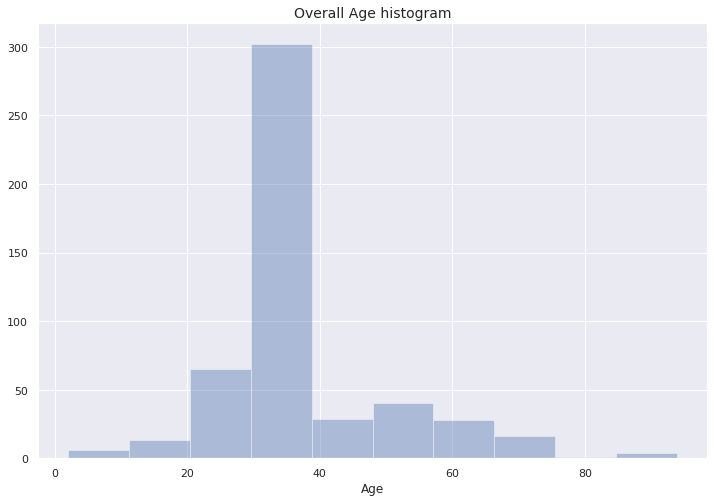

In [0]:
col = 'Age'
fmean = df[col].mean()
fstd = df[col].std()
df.ix[np.abs(df[col]-fmean) > (3*fstd), col] = fmean + (3*fstd)  
df.ix[np.abs(df[col]-fmean) < -(3*fstd), col] = -(fmean + (3*fstd)) 

df[col].fillna(df[col].median(), inplace=True) 

col = 'Age'

plt.figure(figsize=(12,8))
sns.distplot(df[col].values, bins=10, kde=False)
plt.xlabel(col, fontsize=12)
plt.title('Overall Age histogram', fontsize=14)
plt.show()

In [0]:
df['Current status'].value_counts()

Hospitalized    478
Recovered        15
Deceased         10
Name: Current status, dtype: int64

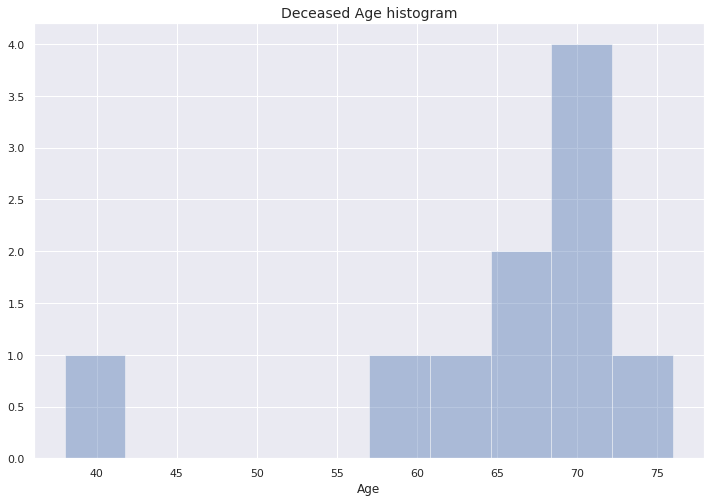

In [0]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Deceased']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Deceased Age histogram', fontsize=14)
plt.show()

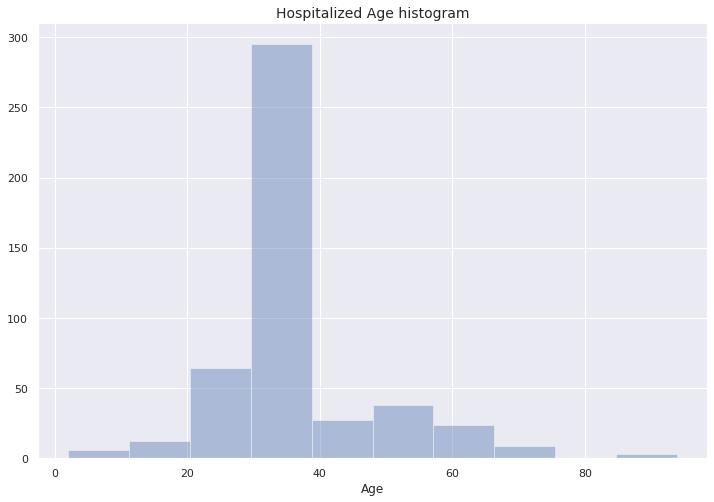

In [0]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Hospitalized']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Hospitalized Age histogram', fontsize=14)
plt.show()

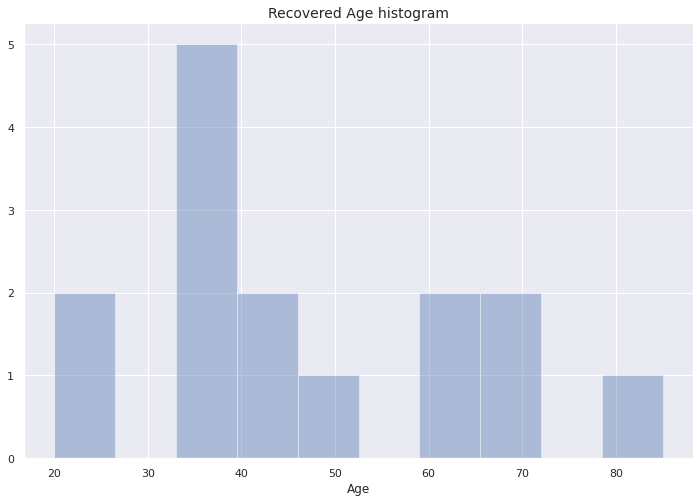

In [0]:
col1 = 'Current status'
col2 = 'Age'
tmp = df[df[col1] == 'Recovered']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=10, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Recovered Age histogram', fontsize=14)
plt.show()

In [0]:
df1=pd.read_csv('population_india_census2011.csv',index_col='Sno')

In [0]:
df1

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
Sno,,,,,,,
1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919


In [0]:
col = 'State / Union Territory'
df1[col]

Sno
1                                Uttar Pradesh
2                                  Maharashtra
3                                        Bihar
4                                  West Bengal
5                               Madhya Pradesh
6                                   Tamil Nadu
7                                    Rajasthan
8                                    Karnataka
9                                      Gujarat
10                              Andhra Pradesh
11                                      Odisha
12                                   Telengana
13                                      Kerala
14                                   Jharkhand
15                                       Assam
16                                      Punjab
17                                Chhattisgarh
18                                     Haryana
19                                 Uttarakhand
20                            Himachal Pradesh
21                                     Tripura
22       